In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

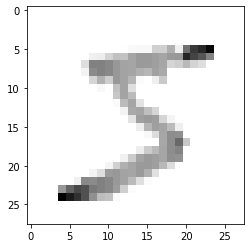

In [11]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [9]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [16]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2702 - acc: 0.9205
Epoch 2/3
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1081 - acc: 0.9662
Epoch 3/3
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0734 - acc: 0.9769


In [18]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.1002 - acc: 0.9702
0.10021285556647927 0.9702


In [19]:
model.save('epic_num_reader.model')

In [21]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [24]:
predictions = new_model.predict(x_test)

In [25]:
print (predictions)

[[4.48782096e-08 8.14806117e-06 1.35514987e-04 ... 9.99830246e-01
  6.22142124e-07 9.99043195e-08]
 [1.41223149e-08 3.18471603e-02 9.68134224e-01 ... 2.17121780e-07
  1.62676656e-06 9.83330528e-10]
 [5.46810348e-08 9.99785841e-01 1.59285846e-05 ... 1.35331909e-04
  5.00572896e-05 1.05755674e-07]
 ...
 [7.74201254e-08 4.62141998e-06 8.86727136e-09 ... 3.81742720e-05
  3.57459285e-05 2.74085579e-03]
 [1.35472973e-07 1.13034839e-05 8.54453617e-07 ... 7.64912693e-05
  9.82668623e-03 7.13124848e-08]
 [4.04800005e-07 4.12064594e-07 2.76882787e-07 ... 8.55927507e-09
  6.72358809e-08 1.93603888e-08]]


In [26]:
print(np.argmax(predictions[0]))

7


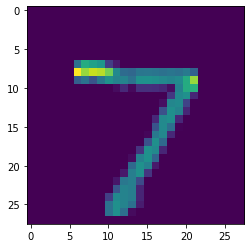

In [27]:
plt.imshow(x_test[0])
plt.show()